Author: [YANG Jiancheng](https://github.com/duducheng)

Reference: 
* [On Spectral Clustering: Analysis and an algorithm](http://ai.stanford.edu/~ang/papers/nips01-spectral.pdf)
* [Spectral Clustering Tutorial Series by Chieu from NEU](https://www.youtube.com/playlist?list=PLdk2fd27CQzT7opzoGHvqDuDbltozWn7O): Good but too trivial

Note: Spectral Clustering has many variants, and can be different to perform on different parameters, when handling "difficult" data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import rbf_kernel

% matplotlib inline

In [2]:
def scatter(X, color=None, ax=None, centroids=None, **kwargs):
    if not ax:
        _, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=color, **kwargs)
    if centroids is not None:
        ax.scatter(centroids[:,0],centroids[::,1],s=350, c=range(centroids.shape[0]), **kwargs)

# assign to the clusters (M-step)
def get_assignments(X, centroids):
    dist = pairwise_distances(X, centroids)
    assign = np.argmin(dist,axis=1)
    return assign

# compute the new centroids (E-step)
def get_centroids(X, assignments):
    centroids = []
    for i in np.unique(assignments):
        centroids.append(X[assignments==i].mean(axis=0))     
    return np.array(centroids)

# initize the centroids
def init_kmeans_plus_plus(X, K):
    '''Choose the next centroids with a prior of distance.'''
    assert K>=2, "So you want to make 1 cluster?"
    compute_distance = lambda X, c: pairwise_distances(X, c).min(axis=1)
    # get the first centroid
    centroids = [X[np.random.choice(range(X.shape[0])),:]]
    # choice next
    for _ in range(K-1):
        proba = compute_distance(X,centroids)**2
        proba /= proba.sum()
        centroids.append(X[np.random.choice(range(X.shape[0]), p=proba)])      
    return np.array(centroids)

def KMeans(X, centroids, n_iterations=5, axes=None):
    if axes is not None:
        axes = axes.flatten()
    for i in range(n_iterations):
        assignments = get_assignments(X, centroids)
        centroids = get_centroids(X, assignments)
        if axes is not None:
            scatter(X, assignments, ax=axes[i], centroids=centroids)
            axes[i].set_title(i)
    return assignments, centroids

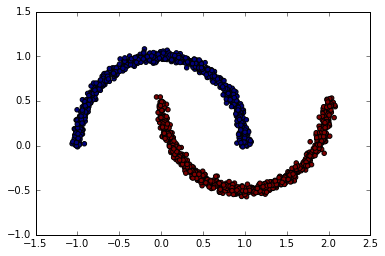

In [3]:
X, y = datasets.make_moons(n_samples=1500, noise=.03)
scatter(X, y)

In [4]:
def spectral_clustering(X, K=2, gamma=10):
    A = rbf_kernel(X, gamma=gamma) 
    A -= np.eye(A.shape[0]) # affinity
    D = A.sum(axis=1) # degree
    D_inv = np.diag(D**(-.5))
    L = (D_inv).dot(A).dot(D_inv) # laplacian
    s, Vh = np.linalg.eig(L)
    eigenvector = Vh.real[:,:K].copy()
    eigenvector /= ((eigenvector**2).sum(axis=1)[:,np.newaxis]**.5)
    centroids = init_kmeans_plus_plus(eigenvector, K)
    assignments, _ = KMeans(eigenvector, centroids)
    return assignments

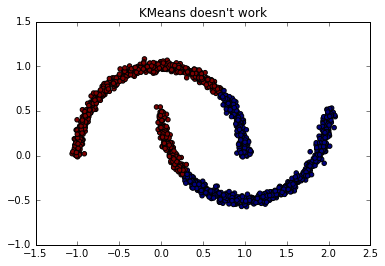

In [5]:
centroids = init_kmeans_plus_plus(X, K=2)
assignments, _ = KMeans(X, centroids)
scatter(X, assignments)
plt.title("KMeans doesn't work")

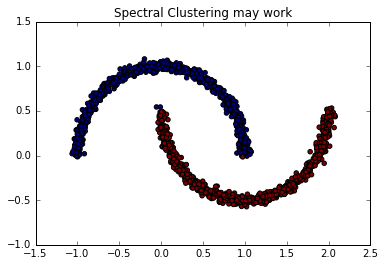

In [6]:
scatter(X, spectral_clustering(X, gamma=10))
plt.title("Spectral Clustering may work")

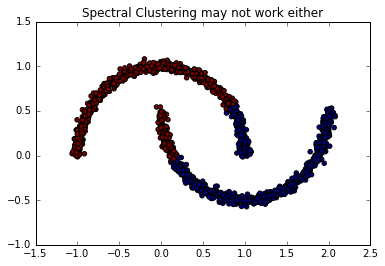

In [7]:
scatter(X, spectral_clustering(X, gamma=3))
plt.title("Spectral Clustering may not work either")

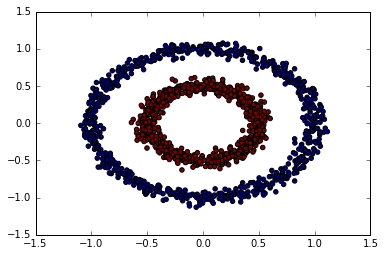

In [8]:
X, y = datasets.make_circles(n_samples=1500, factor=0.5, noise=0.05)
scatter(X, y)

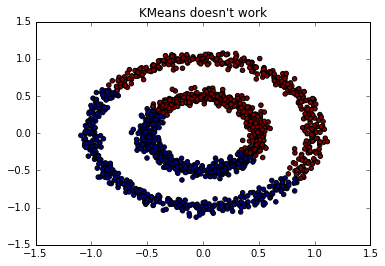

In [9]:
centroids = init_kmeans_plus_plus(X, K=2)
assignments, _ = KMeans(X, centroids)
scatter(X, assignments)
plt.title("KMeans doesn't work")

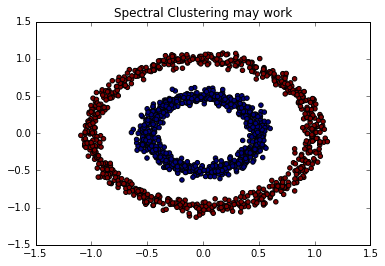

In [10]:
scatter(X, spectral_clustering(X, gamma=100))
plt.title("Spectral Clustering may work")

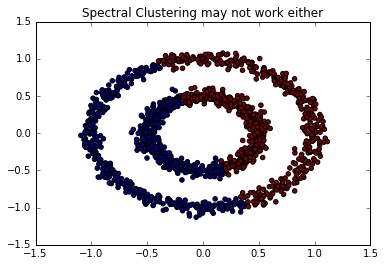

In [11]:
scatter(X, spectral_clustering(X, gamma=10))
plt.title("Spectral Clustering may not work either")

So, the implementation is really simple, but it seems there are still a lot of things to do. It does.